In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
import plotly.figure_factory as ff
from scipy import stats

In [25]:
data=pd.read_csv('Dav_data.csv')

In [26]:
data

,Unnamed: 0,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,3,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,Self,0
2,6,1,1,1,1,1,1,0,1,0,...,f,White-European,no,no,Canada,no,12.598583,18 and more,Self,0
3,7,0,0,0,0,0,0,0,0,0,...,m,Middle Eastern,yes,no,United Arab Emirates,no,3.525720,18 and more,Self,0
4,8,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,no,United Kingdom,no,11.902461,18 and more,Self,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,794,0,0,1,1,1,1,1,1,1,...,m,Pasifika,no,no,Viet Nam,no,11.280522,18 and more,Self,0
624,795,1,1,1,1,1,1,1,1,1,...,f,White-European,no,yes,United States,no,13.390868,18 and more,Self,1
625,797,0,0,0,0,0,0,1,0,1,...,m,White-European,yes,no,Jordan,no,6.805509,18 and more,Self,1
626,798,1,1,1,1,1,1,0,1,1,...,f,Middle Eastern,no,yes,United States,no,3.682732,18 and more,Relative,0


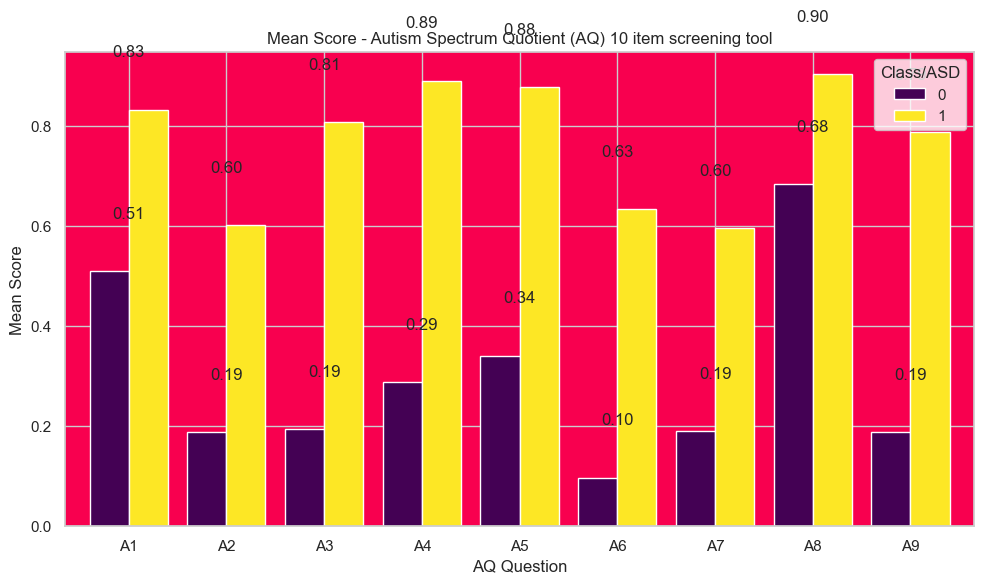

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

score_features = data.filter(regex='A[0-9]_', axis=1).columns.tolist()

# Group by 'Class/ASD' and calculate the mean for score_features
mean_scores = data.groupby('Class/ASD')[score_features].mean().T

# Create a bar plot
ax = mean_scores.plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)

# Set plot title and labels
plt.title('Mean Score - Autism Spectrum Quotient (AQ) 10 item screening tool')
plt.xlabel('AQ Question')
plt.ylabel('Mean Score')

# Customize x-axis labels
x_ticks = np.arange(len(score_features))
x_tick_labels = [x.split('_')[0] for x in score_features]
plt.xticks(x_ticks, x_tick_labels, rotation=0)

# Add data labels above each bar
for i, col in enumerate(mean_scores.columns):
    for x, y in zip(x_ticks, mean_scores[col]):
        plt.text(x, y + 0.1, f'{y:.2f}', ha='center', va='bottom')

# Add a legend
plt.legend(title='Class/ASD', loc='upper right')

plt.gca().set_facecolor('#F8004F')
plt.tight_layout()
plt.show()


In [82]:
# Define a custom color scale
color_scale = px.colors.qualitative.Set3

fig = px.treemap(data, 
                 path=['contry_of_res', 'Class/ASD'], 
                 color='Class/ASD',
                 color_continuous_scale=color_scale,
                 labels={'contry_of_res': 'Country of Residence', 'Class/ASD': 'Class/ASD'},
)

# Update layout and style
fig.update_layout(
    title="<b>COUNTRY OF RESIDENCE OF THE PATIENT - TREEMAP</b>",
    title_font=dict(size=20, family="Sans Serif"),
    height=600,
    width=1000,
    template='plotly_dark',  # Dark background template
    autosize=False,
    margin=dict(l=50, r=50, b=50, t=100),
    treemapcolorway=color_scale,  # Match color scale to data
)

# Add padding to the top margin for the title
fig.update_layout(margin=dict(t=50, l=50, r=50, b=100))

# Show the enhanced graph
fig.show()


In [57]:
fig.update_layout(
    title="<b> COUNTRY OF RESIDENCE OF THE PATIENT - HISTOGRAM <b>",
    font_family="San Serif",
    titlefont={'size': 20},
    legend=dict(
        orientation="v", y=1, yanchor="top", x=1.0, xanchor="right"
    ),
    xaxis=dict(categoryorder='total descending'),
    plot_bgcolor='lightgreen'  # Change the background color here
)

fig.show()

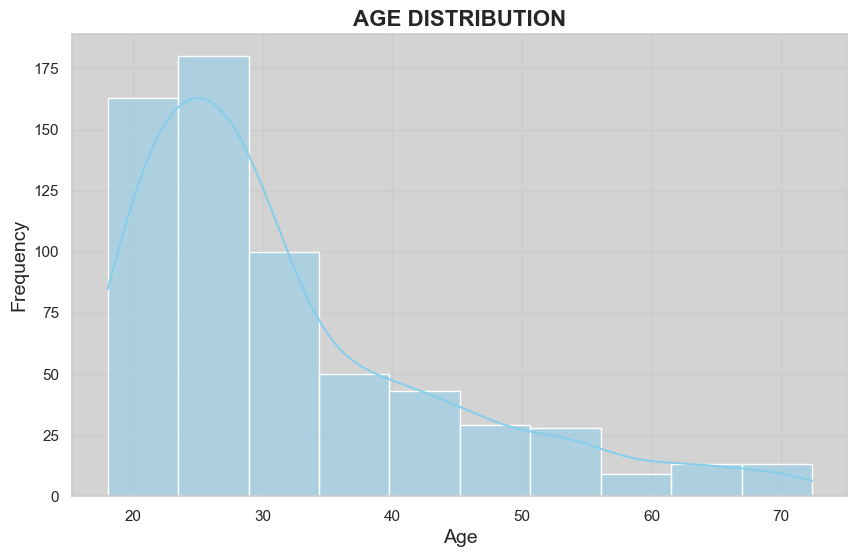

In [58]:


# Create a function to generate a distribution plot
def plot_distplot(df, col, title):
    plt.figure(figsize=(10, 6))
    
    # Create a distribution plot with Seaborn
    sns.set(style="whitegrid")  # Set the style
    
    sns.histplot(df[col], kde=True, color='skyblue', bins=10)  # Customize color and other attributes
    
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel("Age", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    
    # Add a colored background
    plt.gca().set_facecolor('lightgray')  # Change 'lightgray' to your desired background color
    
    # Add your additional design enhancements here (e.g., grid lines, etc.)
    
    plt.show()

# Call the function with your data and preferences
plot_distplot(
    df=data,
    col='age',
    title="AGE DISTRIBUTION"
)


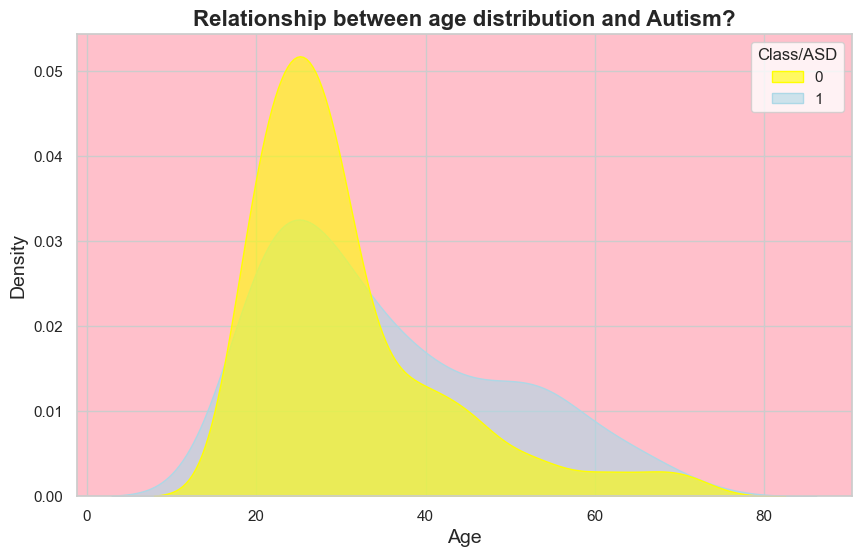

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a distribution plot with KDE for different classes
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.kdeplot(data=data, x='age', hue='Class/ASD', common_norm=False, fill=True,
            palette=['yellow', 'lightblue'], alpha=0.6)

plt.title("Relationship between age distribution and Autism?", fontsize=16, weight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.gca().set_facecolor('pink')
# Add any additional customization as needed

plt.show()


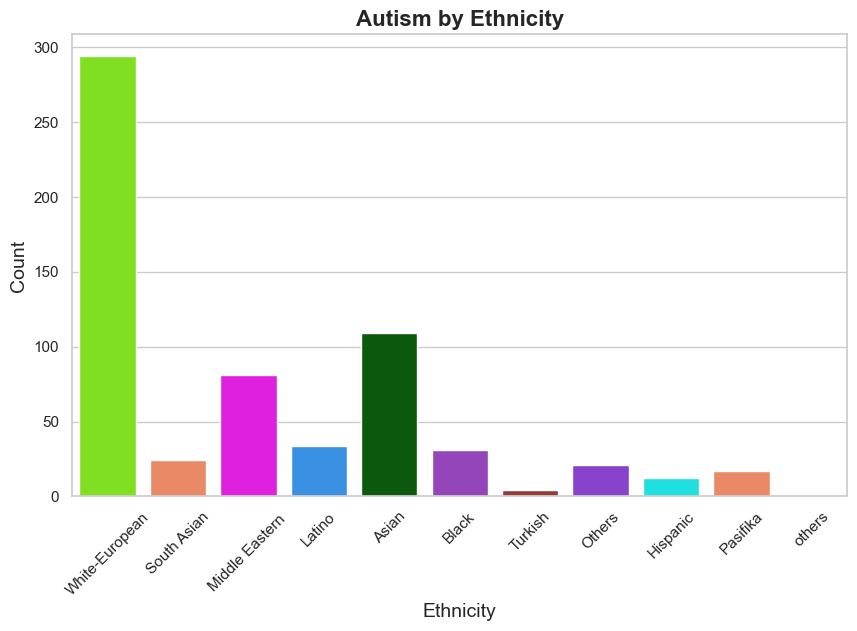

In [69]:

ethnicity_colors = ['chartreuse', 'coral', 'magenta', 'dodgerblue', 'darkgreen', 'darkorchid', 'brown', 'BlueViolet', 'cyan', 'coral', 'Turquoise', 'Gold']

# Create a countplot with custom colors
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.countplot(data=data, x='ethnicity', palette=ethnicity_colors)

plt.title("Autism by Ethnicity", fontsize=16, weight='bold')
plt.xlabel("Ethnicity", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add any additional customization as needed

plt.show()


In [77]:
import plotly.graph_objs as go
ASD_pos_result = data[data['Class/ASD'] == 1]['result']
ASD_neg_result = data[data['Class/ASD'] == 0]['result']

fig = go.Figure()
fig.add_trace(go.Violin(x=ASD_pos_result, line_color='lightseagreen', name='ASD_positive', y0=0))
fig.add_trace(go.Violin(x=ASD_neg_result, line_color='red', name= 'ASD_negative', y0=0))

fig.update_traces(orientation='h', side='positive', meanline_visible=True)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)

fig.update_layout(title='<b> Screening test result distribution (QA1-10) <b>',
                  font_family="San Serif",
                  xaxis_title='Result',
                  titlefont={'size': 20},
                  width=600,
                  height=400,
                  template="simple_white",
                  showlegend=True,
                  )
fig.update_yaxes(showgrid=False, showline=False, showticklabels=False)
fig.show()

In [81]:
def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


def plot_carmersV_corr(df):
    rows= []
    for x in df:
        col = []
        for y in df :
            cramers =cramers_v(df[x], df[y])
            col.append(round(cramers,2))
        rows.append(col)

    cramers_results = np.array(rows)
    df_corr = pd.DataFrame(cramers_results, columns = df.columns, index = df.columns)

    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    df_corr = df_corr.mask(mask)


    fig = go.Figure(data= go.Heatmap(z=df_corr,
                                     x=df_corr.index.values,
                                     y=df_corr.columns.values,
                                     colorscale='purples',                                  
                                     )
                    )
    fig.update_layout(title_text='<b>Correlation Heatmap (Categorical features) <b>',
                      font_family="San Serif",
                      title_x=0.5,
                      titlefont={'size': 20},
                      width=750, height=700,
                      xaxis_showgrid=False,
                      xaxis={'side': 'bottom'},
                      yaxis_showgrid=False,
                      yaxis_autorange='reversed',                   
                                        autosize=False,
                      margin=dict(l=150,r=50,b=150,t=70,pad=0),
                      )
    fig.show()
    
plot_carmersV_corr(data.drop(['age', 'result'], axis=1))

C:\Users\HP\AppData\Local\Temp\ipykernel_17380\3837591053.py:10: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\HP\AppData\Local\Temp\ipykernel_17380\3837591053.py:10: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\HP\AppData\Local\Temp\ipykernel_17380\3837591053.py:10: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\HP\AppData\Local\Temp\ipykernel_17380\3837591053.py:10: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\HP\AppData\Local\Temp\ipykernel_17380\3837591053.py:10: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\HP\AppData\Local\Temp\ipykernel_17380\3837591053.py:10: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\HP\AppData\Local\Temp\ipykernel_17380\3837591053.py:10: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\HP\AppData\Local\Temp\ipykernel_17380\3837591053.py:10: RuntimeWarning:

invalid value encountered in

In [3]:
x_train=pd.read_csv('x_train.csv')

In [4]:
x_train

,Unnamed: 0,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jaundice,austim,contry_of_res,result
0,425,0,0,1,1,1,0,0,1,0,1,42.061760,9,0,0,44,7.277024
1,12,1,0,1,1,1,1,1,1,1,1,29.112066,9,1,1,54,12.811125
2,139,0,0,1,1,0,0,1,1,0,0,22.120522,9,0,0,31,5.224789
3,149,1,0,1,1,1,0,0,1,1,1,23.456872,9,1,0,26,4.528127
4,615,1,0,0,0,1,0,0,1,1,0,28.983539,3,0,0,1,8.523430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,101,1,0,0,0,0,0,0,0,0,0,45.374722,0,0,0,35,6.115176
498,141,1,0,1,1,1,0,1,1,1,1,47.988009,9,0,0,53,9.640370
499,348,0,0,0,0,0,0,0,1,0,0,43.200863,9,1,0,26,8.236165
500,554,0,0,0,0,0,0,0,1,0,0,30.766961,5,0,0,54,6.727457


In [1]:
import pandas as pd

data = {
    'A1_Score': [0.0439],
    'A2_Score': [0.0726],
    'A3_Score': [0.1533],
    'A4_Score': [0.1486],
    'A5_Score': [0.1175],
    'A6_Score': [0.1372],
    'A7_Score': [0.0697],
    'A8_Score': [0.027],
    'A9_Score': [0.1474],
    'A10_Score': [0.1172],
    'age': [0.0277],
    'gender': [0.0073],
    'ethnicity': [0.0484],
    'jaundice': [0.018],
    'austim': [0.0663],
    'contry_of_res': [0.1041],
    'used_app_before': [0.0],
    'result': [0.1512],
    'age_desc': [0.0],
    'relation': [0.0092]
}

df = pd.DataFrame(data).T.reset_index()
df.columns = ['Feature', 'Value']
df = df.rename(columns={'index': 'Feature'})


In [2]:
df

,Feature,Value
0,A1_Score,0.0439
1,A2_Score,0.0726
2,A3_Score,0.1533
3,A4_Score,0.1486
4,A5_Score,0.1175
5,A6_Score,0.1372
6,A7_Score,0.0697
7,A8_Score,0.0270
8,A9_Score,0.1474
9,A10_Score,0.1172
